In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# Display columns with null values and their count
null_columns = train.isnull().sum()
null_columns = null_columns[null_columns > 0]
null_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
train.drop(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

<Axes: >

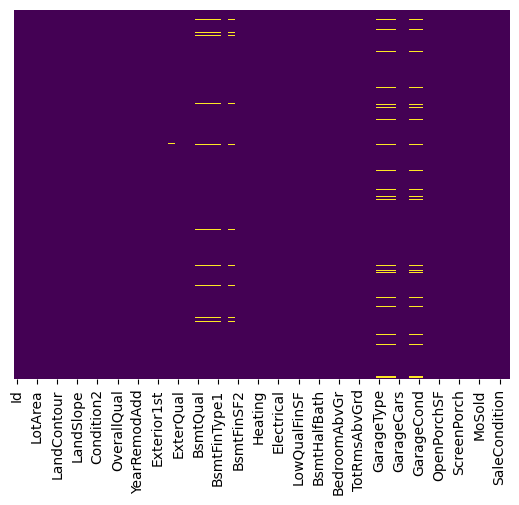

In [7]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [8]:
train.loc[:, 'Condition1':'OpenPorchSF'].nunique()

Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
YearBuilt       112
YearRemodAdd     61
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrArea      327
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinSF1      637
BsmtFinType2      6
BsmtFinSF2      144
BsmtUnfSF       780
TotalBsmtSF     721
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
1stFlrSF        753
2ndFlrSF        417
LowQualFinSF     24
GrLivArea       861
BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
KitchenQual       4
TotRmsAbvGrd     12
Functional        7
Fireplaces        4
GarageType        6
GarageYrBlt      97
GarageFinish      3
GarageCars        5
GarageArea      441
GarageQual        5
GarageCond        5


In [9]:
street = pd.get_dummies(train['Street'], drop_first=True).astype(int)
central_air = pd.get_dummies(train['CentralAir'], drop_first=True).astype(int)
garage_finish = pd.get_dummies(train['GarageFinish'], drop_first=True).astype(int)

paved_drive = pd.get_dummies(train['PavedDrive'], drop_first=True).astype(int)

In [10]:
train.drop(['Street','CentralAir','GarageFinish','HalfBath','BsmtHalfBath','PavedDrive'], axis=1, inplace=True)

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
train = pd.concat([train, street, central_air,garage_finish,paved_drive], axis=1)

In [13]:
# Identify duplicate column names
duplicate_columns = train.columns[train.columns.duplicated()].unique()

print("Duplicate columns:", duplicate_columns)
train = train.loc[:, ~train.columns.duplicated()]

Duplicate columns: Index(['Y'], dtype='object')


<Axes: >

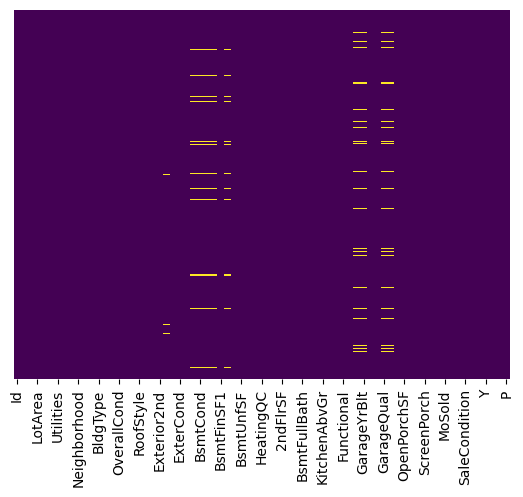

In [14]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [15]:
dtypes = train.dtypes

# Filter columns with dtype 'int64'
object_columns = dtypes[dtypes == 'object'].index
# Print the columns with dtype 'int64'
object_columns

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageQual',
       'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
train.drop(columns=object_columns, axis=1, inplace=True)

In [17]:
train[train['Pave'] == 0]['GarageYrBlt']

52      1963.0
335     1965.0
582        NaN
812     1952.0
1061    1994.0
1184    1963.0
Name: GarageYrBlt, dtype: float64

<Axes: xlabel='Pave', ylabel='GarageYrBlt'>

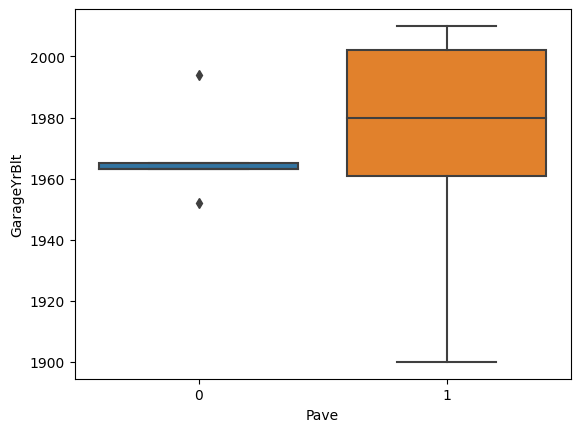

In [18]:
sns.boxplot(train,x='Pave',y='GarageYrBlt')

In [19]:
 def impute_age(cols):
        GarageYrBlt = cols.iloc[0]
        Pave = cols.iloc[1]
        
        if pd.isnull(GarageYrBlt):
            if Pave == 1:
                return 1980
            elif Pave == 0:
                return 1970 
            else:
                return 1978
        else:
            return GarageYrBlt

In [20]:
train['GarageYrBlt'] = train[['GarageYrBlt', 'Pave']].apply(impute_age, axis=1)

In [21]:
train.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Pave,Y,RFn,Unf,P
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,0,8,2007,175000,1,1,1,0,0
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,0,0,2,2010,210000,1,1,0,1,0
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,2500,5,2010,266500,1,1,1,0,0
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,0,0,4,2010,142125,1,1,0,1,0
1459,1460,20,9937,5,6,1965,1965,0.0,830,290,...,0,0,6,2008,147500,1,1,0,0,0


<Axes: xlabel='Pave', ylabel='MasVnrArea'>

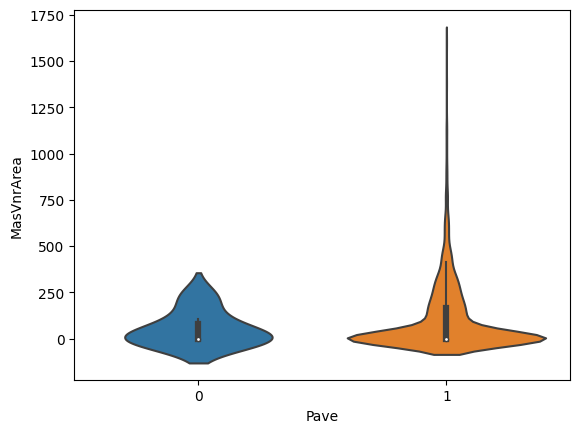

In [22]:
sns.violinplot(x='Pave', y='MasVnrArea', data=train)


In [23]:
 def impute_area(cols):
        MasVnrArea = cols.iloc[0]
        Pave = cols.iloc[1]
        
        if pd.isnull(MasVnrArea):
            if Pave == 1:
                return 625
            elif Pave == 0:
                return 375
            else:
                return 103
        else:
            return MasVnrArea

In [24]:
train['MasVnrArea'] = train[['MasVnrArea', 'Pave']].apply(impute_age, axis=1)

In [25]:
X_train = train.drop('SalePrice', axis =1)
y_train = train['SalePrice']

In [26]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(X_train,y_train)

LinearRegression()

In [27]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
# Display columns with null values and their count
null_columns = test.isnull().sum()
null_columns = null_columns[null_columns > 0]
null_columns

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [29]:
test.drop(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [30]:
street1 = pd.get_dummies(test['Street'], drop_first=True).astype(int)
central_air1 = pd.get_dummies(test['CentralAir'], drop_first=True).astype(int)
garage_finish1 = pd.get_dummies(test['GarageFinish'], drop_first=True).astype(int)

paved_drive1 = pd.get_dummies(test['PavedDrive'], drop_first=True).astype(int)

In [31]:
test.drop(['Street','CentralAir','GarageFinish','HalfBath','BsmtHalfBath','PavedDrive'], axis=1, inplace=True)

In [32]:
test = pd.concat([test, street1, central_air1,garage_finish1,paved_drive1], axis=1)

In [33]:
# Identify duplicate column names
duplicate_columns = test.columns[test.columns.duplicated()].unique()

print("Duplicate columns:", duplicate_columns)
test = test.loc[:, ~test.columns.duplicated()]

Duplicate columns: Index(['Y'], dtype='object')


<Axes: >

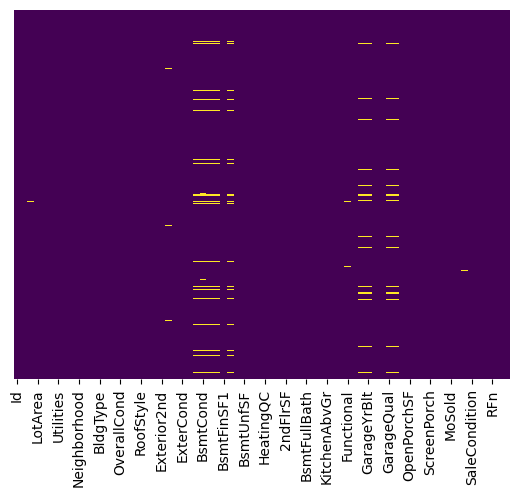

In [34]:
sns.heatmap(test.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [35]:
dtypes = test.dtypes

# Filter columns with dtype 'int64'
object_columns = dtypes[dtypes == 'object'].index
# Print the columns with dtype 'int64'
object_columns

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageQual',
       'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
test.drop(columns=object_columns, axis=1, inplace=True)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  FullBath       1459 non-null   int64  
 18  BedroomA

<Axes: >

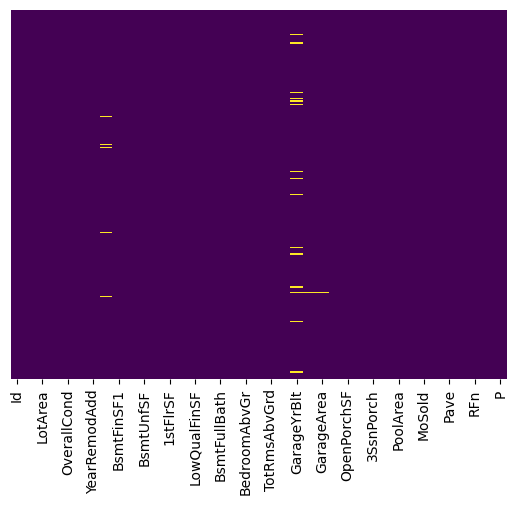

In [38]:
sns.heatmap(test.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [39]:
 def impute_age(cols):
        GarageYrBlt = cols.iloc[0]
        Pave = cols.iloc[1]
        
        if pd.isnull(GarageYrBlt):
            if Pave == 1:
                return 1980
            elif Pave == 0:
                return 1970 
            else:
                return 1978
        else:
            return GarageYrBlt

In [40]:
test['GarageYrBlt'] = test[['GarageYrBlt', 'Pave']].apply(impute_age, axis=1)

<Axes: xlabel='Pave', ylabel='MasVnrArea'>

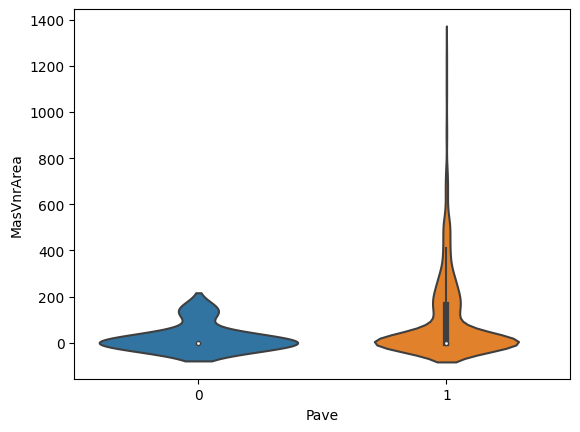

In [41]:
sns.violinplot(x='Pave', y='MasVnrArea', data=test)

In [42]:
test['MasVnrArea'] = test[['MasVnrArea', 'Pave']].apply(impute_age, axis=1)

<Axes: >

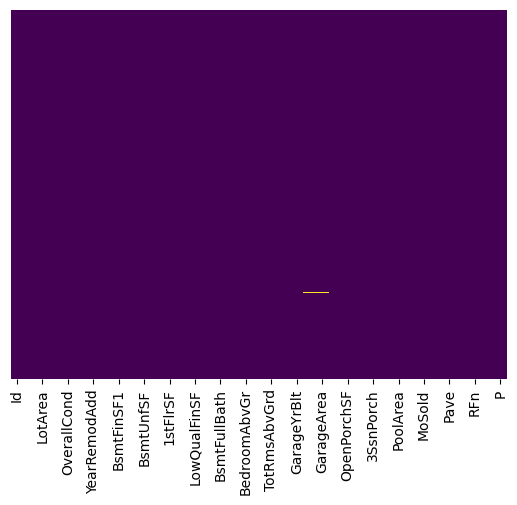

In [43]:
sns.heatmap(test.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [44]:
mode_values = test.mode().iloc[0]

# Fill NaN values with the mode
test.fillna(mode_values, inplace=True)

In [45]:
# Display columns with null values and their count
null_columns = test.isnull().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Series([], dtype: int64)

In [46]:
test.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Pave,Y,RFn,Unf,P
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,6,2006,1,1,0,0,0
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,4,2006,1,1,0,1,0
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,9,2006,1,1,0,1,0
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,700,7,2006,1,1,0,0,0
1458,2919,60,9627,7,5,1993,1994,94.0,758.0,0.0,...,0,0,0,11,2006,1,1,0,0,0


In [47]:
train.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'Pave', 'Y', 'RFn', 'Unf', 'P'],
      dtype='object')

In [48]:
test.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Pave', 'Y',
       'RFn', 'Unf', 'P'],
      dtype='object')

In [49]:
X_final = test
pred = lg.predict(X_final)

In [50]:
output = pd.DataFrame({'Id': test['Id'], 'SalePrice': pred})

In [51]:
output

,Id,SalePrice
0,1461,120378.545909
1,1462,154445.976788
2,1463,179916.944836
3,1464,207015.442311
4,1465,191825.396303
...,...,...
1454,2915,61667.024492
1455,2916,60977.974849
1456,2917,174897.773203
1457,2918,100443.460288


In [52]:
output.to_csv('submission.csv', index=False)

In [53]:
len(output)

1459